In [190]:
import numpy as np
import matplotlib.pyplot as plt

In [380]:
A = np.array([[8, 7, 1, np.nan, 4],
             [9, 7, 2, 5, 6],
             [1, 4, 9, np.nan, 3],
             [3, np.nan, 8, 5, 4],
             [np.nan, 3, np.nan, 9, 9],
             [5, 1, 4, 10, np.nan]])
np.nanmean(A)
# from the exercise sheet
mean_of_known = 5.5
np.putmask(A, np.isnan(A), mean_of_known)
A

array([[ 8. ,  7. ,  1. ,  5.5,  4. ],
       [ 9. ,  7. ,  2. ,  5. ,  6. ],
       [ 1. ,  4. ,  9. ,  5.5,  3. ],
       [ 3. ,  5.5,  8. ,  5. ,  4. ],
       [ 5.5,  3. ,  5.5,  9. ,  9. ],
       [ 5. ,  1. ,  4. , 10. ,  5.5]])

In [334]:
# mA = np.mean(A, axis=0)
# A = A - mA
# A

In [338]:
U, s, VT = np.linalg.svd(A)
Σ = np.zeros(A.shape)
Σ[:5, :5] = np.diag(s)
assert np.allclose(A, U.dot(Σ).dot(VT))
U.shape, Σ.shape, VT.shape

((6, 6), (6, 5), (5, 5))

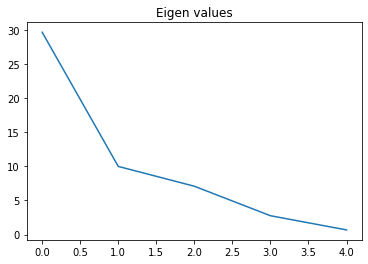

In [301]:
plt.figure()
plt.title('Eigen values')
plt.plot(Σ)

In [302]:
for i in range(Σ.shape[0]):
    U_ = U[:, :i+1]
    print(f'Reconstruction err for {i+1} eigen values: {np.sum(np.square(A - U_@U_.T@A))}')

Reconstruction err for 1 eigen values: 158.37216988938545
Reconstruction err for 2 eigen values: 58.3470409586189
Reconstruction err for 3 eigen values: 8.074205547129234
Reconstruction err for 4 eigen values: 0.4569108232034014
Reconstruction err for 5 eigen values: 6.045139724321766e-28


__Question 1.8__: Now reduce the dimensionality to $k=2$

In [303]:
movies = np.array(['American Pie', 'Shrek', 'Titanic', 'Godfather', 'Avatar', 'Star Wars'])
users = np.array(['Ben', 'Tom', 'John', 'Fred', 'Jack'])

In [304]:
k = 2
U_ = U[:, :k]
A_ = U_ @ U_.T @ A
Z = U_.T @ A
Z.shape, Z

((2, 5),
 array([[-13.20735084, -10.99934818, -11.5975402 , -16.54863217,
         -13.35469536],
        [ -5.95883312,  -2.5327528 ,   7.44304164,   1.58271361,
          -0.44581253]]))

((6, 5),
 (6, 2),
 array([[-0.3839444 , -0.51022397],
        [-0.4329622 , -0.5122112 ],
        [-0.3317707 ,  0.5825038 ],
        [-0.37303067,  0.33859503],
        [-0.49715572,  0.10794286],
        [-0.41078333,  0.10817697]]),
 ['American Pie', 'Shrek', 'Titanic', 'Godfather', 'Avatar', 'Star Wars'])

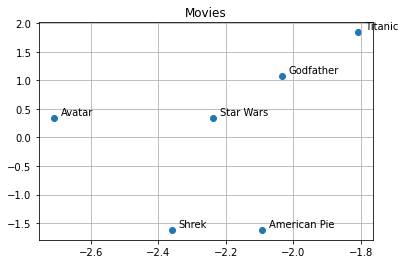

In [346]:
plt.figure()
plt.title('Movies')
plt.grid()

# plt.axhline(0,color='red') # x = 0
# plt.axvline(0,color='red') # y = 0
# plt.xlim(-0.8, 0.2)
# plt.ylim(-0.8, 0.8)

# x = U_[:, 0]
# y = U_[:, 1]
x, y = U.dot(np.sqrt(Σ))[:, :2].T

plt.scatter(x, y)
for i in range(len(movies)):
    plt.annotate(movies[i], (x[i] + .02, y[i] + .05))
A_.shape, U_.shape, U_, movies

In [343]:
x, y = U.dot(np.sqrt(Σ))[:, :2].T
x, y

(array([-2.09243136, -2.35957   , -1.80809361, -2.03295336, -2.70941367,
        -2.23869894]),
 array([-1.61357121, -1.61985579,  1.84215446,  1.07079875,  0.34136673,
         0.3421071 ]))

In [375]:
(U @ Σ)[:, :2] == (U_.T @ Σ)
(U_.T @ Σ), (U @ Σ)[:, :2].T

<ipython-input-375-9663780adb41>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  (U @ Σ)[:, :2] == (U_.T @ Σ)


(array([[-11.40339327,  -4.33016598,  -2.35236506,  -1.02954401,
          -0.3360533 ],
        [-15.1539768 ,  -5.12275555,   4.13014646,   0.93450355,
           0.07296417]]),
 array([[-11.40339327, -12.85925315,  -9.85380111, -11.07924833,
         -14.76584139, -12.20052658],
        [ -5.10288071,  -5.12275555,   5.82576984,   3.38637567,
           1.07956418,   1.08190561]]))

(array([[-0.44468241, -0.59580846],
        [-0.37034048, -0.25324346],
        [-0.3904812 ,  0.74421066],
        [-0.55718105,  0.15825148],
        [-0.4496434 , -0.04457565]]),
 ['Ben', 'Tom', 'John', 'Fred', 'Jack'])

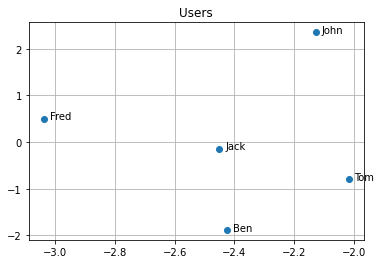

In [352]:
plt.figure()
plt.title('Users')

# plt.axhline(0,color='red') # x = 0
# plt.axvline(0,color='red') # y = 0
# plt.xlim(-0.8, 0.2)
# plt.ylim(-0.8, 0.8)
plt.grid()

V_ = VT[:2, :]
Z_users = V_ @ A.T

# x = V_[0, :]
# y = V_[1, :]
x, y = np.sqrt(Σ).dot(VT)[:2, :]

plt.scatter(x, y)
for i in range(len(users)):
    plt.annotate(users[i], (x[i] + .02, y[i] - .02))
V_.T, users

__Question 11__: Approximation of the original matrix A using only the first three singular components

array([[29.70063686,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 10.00125637,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  7.09033394,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [379]:
k = 3
Σ_ = np.zeros(A.shape)
Σ_[:k, :k] = Σ[:k, :k]
Σ_
# Reconstruction:
A_3 = U @ Σ_ @ VT
A_3
res_3 = (A_3 - A)
print(f'For k = {k}')
print(f'Euclidean norm: {np.linalg.norm(res_3, 2), Σ[k, k]}')
print(f'Frobenius norm: {np.linalg.norm(res_3, "fro"), np.sqrt(np.sum(Σ[k:, k:]**2))}')
# frob norm is equal to the trace of R.T @ R
# np.trace(res_3.T @ res_3)
# np.sum(res_3**2)

For k = 3
Euclidean norm: (2.7599446958092893, 2.7599446958092893)
Frobenius norm: (2.8415146572082355, 2.841514657208235)


In [378]:
k = 2
Σ_ = np.zeros(A.shape)
Σ_[:k, :k] = Σ[:k, :k]
Σ_
# Reconstruction:
A_k = U @ Σ_ @ VT
A_k
res_k = (A_k - A)
print(f'For k = {k}')
print(f'Euclidean norm: {np.linalg.norm(res_k, 2), Σ[k, k]}')
print(f'Frobenius norm: {np.linalg.norm(res_k, "fro"), np.sqrt(np.sum(Σ[k:, k:]**2))}')
# frob norm is equal to the trace of R.T @ R
# np.trace(res_3.T @ res_3)
# np.sum(res_3**2)

For k = 2
Euclidean norm: (7.090333942170118, 7.0903339421701155)
Frobenius norm: (7.638523480268874, 7.638523480268869)


__Add new user__
SVD cannot naively handle new users or new items.

In [382]:
bob = np.array([[1, np.nan, np.nan, 6, np.nan, 10]], dtype=np.float64) # 2d array such that dimensions match later
bob[np.isnan(bob)] = mean_of_known
bob

array([[ 1. ,  5.5,  5.5,  6. ,  5.5, 10. ]])

(6, 6) (6, 6) (6, 6)


Text(0, 0.5, 'The Seriousness Axis')

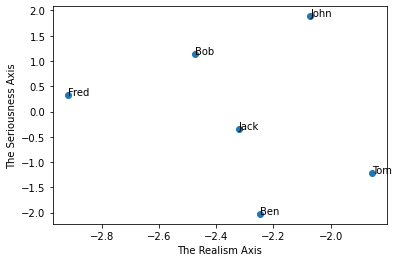

In [387]:
k = 2
Ab = np.append(A, bob.T, axis=1)
Ub, sb, VTb = np.linalg.svd(Ab, full_matrices=True)
Σb = np.diag(sb)

print(Ub.shape, Σb.shape, VTb.shape)

v1v2b = np.sqrt(Σb).dot(VTb)[:k, :]

plt.figure()
plt.scatter(*v1v2b)
for v1, v2, name in zip(*v1v2b, users + ['Bob']):
    plt.gca().annotate(name, (v1, v2))
plt.xlabel('The Realism Axis')
plt.ylabel('The Seriousness Axis')

In [389]:
# In this case new predictions could be calculated as follows
k = 2 # you can check this gives back the original predictions if k == 6
U_bob = bob.dot(U[:, :k])
bob_ = U[:, :k].dot(U_bob.T)
bob_predicted = bob_[:].ravel()
for i in reversed(np.argsort(bob_predicted)):
    print(movies[i], '{:.2}'.format(bob_predicted[i]))

Avatar 7.2
Titanic 6.6
Godfather 6.3
Star Wars 6.0
Shrek 4.1
American Pie 3.4
